## **Whole Network Entropy** (**Day 3**)

# **IMPORTANT!** Before we begin, change runtime type to R

**0. Testing bootstrapping**

In [ ]:
# bootstrap test

data <- c(5,7,9,10,11)
n_iteration <- 100

bootstrap_means <- numeric(n_iteration)
set.seed(42)

for (i in 1:n_iteration) {
  bootstrap_sample <- sample(data, size = length(data), replace = TRUE)
  bootstrap_means[i] <- mean(bootstrap_sample)
}

lower <- quantile(bootstrap_means, 0.025)
upper <- quantile(bootstrap_means, 0.975)

cat("Bootstrap confidence intervals for the mean:", lower, "to", upper, "\n")
mean(data)

In [ ]:
group_1 <- c(5,7,8)
group_2 <- c(6,9,10)
observed_diff <- mean(group_1) - mean(group_2)

combined <- c(group_1, group_2)
n <- length(group_1)

n_permutations <- 100
permutated_diffs <- numeric(n_permutations)

set.seed(42)

for (i in 1:n_permutations) {
  permmutatted <- sample(combined)
  permutated_diffs[i] <- mean(permmutatted[1:n]) - mean(permmutatted[(n+1):length(permmutatted)])

}

p_value <- mean(abs(permutated_diffs) >= abs(observed_diff))

cat("observed Difference:", observed_diff, "\n")
cat("P-value: ", p_value, "\n")

### **1. Load in data**

In [ ]:
exp_data <- read.csv('/content/X.csv', header=FALSE)
metadata <-read.csv('/content/obs.csv')
var_data<- read.csv('/content/var.csv')

rownames(exp_data)<-metadata$CellID
colnames(exp_data)<-var_data$Gene


### **2. Create Metadata and Expression data for the 3 cell types; Secretory Epithelial-1, Secretory Epithelial-2, STIC lesion**

In [ ]:
install.packages("dplyr")
library(dplyr)
metadata_SE2 <- metadata[metadata$Celltype %in% c('Secretory Epithelial-2'),]
exp_data_SE2 <- exp_data[rownames(exp_data) %in% metadata_SE2$CellID,]




### Get data for own graph - all cell types ###
# benign
metadata_Benign <- metadata[metadata$Disease_stage %in% c('Benign'),]
exp_data_Benign <- exp_data[rownames(exp_data) %in% metadata_Benign$CellID,]
ncol(exp_data_Benign)

# 'IIIc','IIIc1' 'IV'
# stage 1
metadata_I <- metadata[metadata$Disease_stage %in% c('I'),]
exp_data_I <- exp_data[rownames(exp_data) %in% metadata_I$CellID,]
ncol(exp_data_I)

# stage IIIc
metadata_IIIc <- metadata[metadata$Disease_stage %in% c('IIIc'),]
exp_data_IIIc <- exp_data[rownames(exp_data) %in% metadata_IIIc$CellID,]
ncol(exp_data_IIIc)

# stage IIIc1
metadata_IIIc1 <- metadata[metadata$Disease_stage %in% c('IIIc1'),]
exp_data_IIIc1 <- exp_data[rownames(exp_data) %in% metadata_IIIc1$CellID,]
ncol(exp_data_IIIc1)


# stage IV
metadata_IV <- metadata[metadata$Disease_stage %in% c('IV'),]
exp_data_IV <- exp_data[rownames(exp_data) %in% metadata_IV$CellID,]
ncol(exp_data_IV)


### only SE2 ##

# benign
metadata_Benign_SE2 <- metadata_SE2[metadata_SE2$Disease_stage %in% c('Benign'),]
exp_data_Benign_SE2 <- exp_data_SE2[rownames(exp_data_SE2) %in% metadata_Benign_SE2$CellID,]
ncol(metadata_Benign_SE2)


# 'IIIc','IIIc1' 'IV'
# stage 1
metadata_I_SE2 <- metadata_SE2[metadata_SE2$Disease_stage %in% c('I'),]
exp_data_I_SE2 <- exp_data_SE2[rownames(exp_data_SE2) %in% metadata_I_SE2$CellID,]
ncol(metadata_I_SE2)

# stage IIIc
metadata_IIIc_SE2 <- metadata_SE2[metadata_SE2$Disease_stage %in% c('IIIc'),]
exp_data_IIIc_SE2 <- exp_data_SE2[rownames(exp_data_SE2) %in% metadata_IIIc_SE2$CellID,]
ncol(metadata_IIIc_SE2)

# stage IIIc1
metadata_IIIc1_SE2 <- metadata_SE2[metadata_SE2$Disease_stage %in% c('IIIc1'),]
exp_data_IIIc1_SE2 <- exp_data_SE2[rownames(exp_data_SE2) %in% metadata_IIIc1_SE2$CellID,]
ncol(metadata_IIIc1_SE2)

# stage IV
metadata_IV_SE2 <- metadata_SE2[metadata_SE2$Disease_stage %in% c('IV'),]
exp_data_IV_SE2 <- exp_data_SE2[rownames(exp_data_SE2) %in% metadata_IV_SE2$CellID,]
ncol(metadata_IV_SE2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 5851

[1] 5851

[1] 5851

[1] 5851

[1] 5851

[1] 15

[1] 15

[1] 15

[1] 15

[1] 15

### **3. Entropy Analysis**

From the expression data of each cell type we would sample 50 genes and calculate the entropy of the expression levels of the 50 genes. Sampling will be iterated 100 times. Finally a boxplot will be plotted to represent the 100 entropy values in each cell type.


*   **Entropy**: Entropy quantifies the amount of uncertainty or randomness in information content. Introduced by Claude Shannon, it is the average number of bits required to encode a message or the unpredictability of a data source.

  - High entropy: A message is highly unpredictable or random
  
  - Low entropy: A message is predictable or repetitive
  - Example: A fair coin flip has 1 bit of entropy per flip because there are two equally likely outcomes (heads or tails).
*   **Sampling/Subsampling**: A technique used to extract a smaller subset of data (a "subsample") from a larger sample or dataset. It is often employed to reduce computational complexity, test robustness, or handle large datasets efficiently without analyzing the entire sample.

* **Purpose**: To provide better coverage of the network. Calculating a single entropy of the entire network could mask clusters/areas of very high or low entropy.

In [ ]:
# for cells, we expect low entropy if they are well defined cell types - less difference bwetween individual cells
# if they have high entropy more difference between individual cells

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("BioQC")
library(BioQC)

exp_data_SE1 <- t(exp_data_SE1)
exp_data_SE2 <- t(exp_data_SE2)
exp_data_STIC <- t(exp_data_STIC)

compilation_SE1_10 <- data.frame()

exp_data_SE1

for (x in 1:10) {
  n <- sample(1:nrow(exp_data_SE1), 50, replace=FALSE)
  test <- exp_data_SE1[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_SE1_10 <- rbind(compilation_SE1_10, samples)

}

compilation_SE1_10

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'BioQC'

also installing the dependencies ‘statmod’, ‘BiocGenerics’, ‘limma’, ‘locfit’, ‘Biobase’, ‘edgeR’


Old packages: 'curl', 'Matrix', 'nlme'

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, 

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': object 'exp_data_SE1' not found


In [ ]:
#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

#BiocManager::install("BioQC")
#library(BioQC)


exp_data_I_SE2 <- t(exp_data_I_SE2)
exp_data_IIIc_SE2<- t(exp_data_IIIc_SE2)
exp_data_IIIc1_SE2 <- t(exp_data_IIIc1_SE2)
exp_data_IV_SE2 <- t(exp_data_IV_SE2)


metadata_Benign_SE2 <- metadata_SE2[metadata_SE2$Disease_stage %in% c('Benign'),]
exp_data_Benign_SE2 <- exp_data_SE2[rownames(exp_data_SE2) %in% metadata_Benign_SE2$CellID,]
exp_data_Benign_SE2 <- t(exp_data_Benign_SE2)

compilation_Benign_SE2 <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_Benign_SE2), 50, replace=FALSE)
  test <- exp_data_Benign_SE2[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_Benign_SE2 <- rbind(compilation_Benign_SE2, samples)
}

compilation_I_SE2 <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_I_SE2), 50, replace=FALSE)
  test <- exp_data_I_SE2[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_I_SE2 <- rbind(compilation_I_SE2, samples)
}

compilation_IIIc_SE2<- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_IIIc_SE2), 50, replace=FALSE)
  test <- exp_data_IIIc_SE2[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_IIIc_SE2 <- rbind(compilation_IIIc_SE2, samples)
}

compilation_IIIc1_SE2 <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_IIIc1_SE2), 50, replace=FALSE)
  test <- exp_data_IIIc1_SE2[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_IIIc1_SE2 <- rbind(compilation_IIIc1_SE2, samples)
}

compilation_IV_SE2 <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_IV_SE2), 50, replace=FALSE)
  test <- exp_data_IV_SE2[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_IV_SE2 <- rbind(compilation_IV_SE2, samples)
}


#### all cell types

exp_data_Benign <- t(exp_data_Benign)
exp_data_I <- t(exp_data_I)
exp_data_IIIc<- t(exp_data_IIIc)
exp_data_IIIc1 <- t(exp_data_IIIc1)
exp_data_IV <- t(exp_data_IV)


compilation_Benign <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_Benign), 50, replace=FALSE)
  test <- exp_data_Benign[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_Benign <- rbind(compilation_Benign, samples)
}

compilation_I <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_I), 50, replace=FALSE)
  test <- exp_data_I[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_I <- rbind(compilation_I, samples)
}

compilation_IIIc<- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_IIIc), 50, replace=FALSE)
  test <- exp_data_IIIc[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_IIIc <- rbind(compilation_IIIc, samples)
}

compilation_IIIc1 <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_IIIc1), 50, replace=FALSE)
  test <- exp_data_IIIc1[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_IIIc1 <- rbind(compilation_IIIc1, samples)
}

compilation_IV <- data.frame()

for (x in 1:100) {
  n <- sample(1:nrow(exp_data_IV_SE2), 50, replace=FALSE)
  test <- exp_data_IV[n,]
  entropy <- BioQC::entropy(test)
  samples <- append(n,entropy)
  compilation_IV <- rbind(compilation_IV, samples)
}




In [ ]:
colnames(compilation_SE1) <- c(paste0("f", 1:50), "Entropy")
#(compilation_SE1$Entropy,
#        main="Secretory Epithelial-1",
#        ylab="Shannon Entropy", ylim=c(6,8))

colnames(compilation_SE2) <- c(paste0("f", 1:50), "Entropy")
#boxplot(compilation_SE2$Entropy,
#        main="Secretory Epithelial-2",
#        ylab="Shannon Entropy", ylim=c(6,8))

colnames(compilation_STIC) <- c(paste0("f", 1:50), "Entropy")
#boxplot(compilation_STIC$Entropy,
#        main="STIC lesion",
#        ylab="Shannon Entropy", ylim=c(6,8))


compilation_SE1$CellType = "Secretory Epithelial-1"
compilation_SE2$CellType = "Secretory Epithelial-2"
compilation_STIC$CellType = "STIC lesion"
means <- c(mean(compilation_SE1$Entropy), mean(compilation_SE2$Entropy), mean(compilation_STIC$Entropy))

combined_df = data.frame(Entropy = c(compilation_SE1$Entropy, compilation_SE2$Entropy, compilation_STIC$Entropy), CellType = c(compilation_SE1$CellType, compilation_SE2$CellType, compilation_STIC$CellType))
# head(combined_df)

ggplot(combined_df, aes(Entropy, color=CellType)) +
  geom_density() +
  geom_vline(xintercept = means, linetype="dashed",
                color = "grey", size=1.5)


ERROR: Error: object 'compilation_SE1' not found


Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


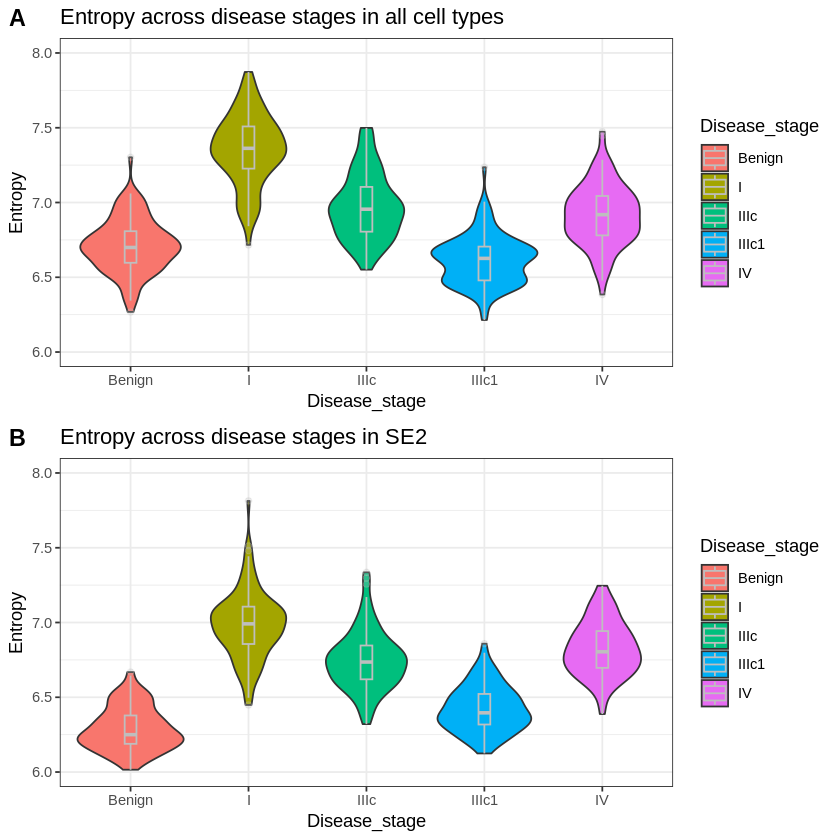

In [ ]:
#install.packages("ggplot2")
#install.packages("cowplot")
#install.packages("EnvStats")
#library(ggplot2)
#library(cowplot)
#library(EnvStats)


## all cell typesd
colnames(compilation_Benign) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_I) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_IIIc) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_IIIc1) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_IV) <- c(paste0("f", 1:50), "Entropy")



compilation_Benign$Disease_stage = "Benign"
compilation_I$Disease_stage = "I"
compilation_IIIc$Disease_stage = "IIIc"
compilation_IIIc1$Disease_stage = "IIIc1"
compilation_IV$Disease_stage = "IV"


combined_df = data.frame(Entropy = c(compilation_Benign$Entropy,compilation_I$Entropy,compilation_IIIc$Entropy, compilation_IIIc1$Entropy, compilation_IV$Entropy), Disease_stage = c(compilation_Benign$Disease_stage, compilation_I$Disease_stage, compilation_IIIc$Disease_stage, compilation_IIIc1$Disease_stage, compilation_IV$Disease_stage))
# head(combined_df)

### only SE1 ##

colnames(compilation_Benign_SE2) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_I_SE2) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_IIIc_SE2) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_IIIc1_SE2) <- c(paste0("f", 1:50), "Entropy")
colnames(compilation_IV_SE2) <- c(paste0("f", 1:50), "Entropy")


# number of samples in each category 1850, 481, 650, 525, 724, 106, 195, 411, 288, 614
# number of genes with expression data 5851 in each

compilation_Benign_SE2$Disease_stage = "Benign"
compilation_I_SE2$Disease_stage = "I"
compilation_IIIc_SE2$Disease_stage = "IIIc"
compilation_IIIc1_SE2$Disease_stage = "IIIc1"
compilation_IV_SE2$Disease_stage = "IV"


combined_df_SE2 = data.frame(Entropy = c(compilation_Benign_SE2$Entropy,compilation_I_SE2$Entropy,compilation_IIIc_SE2$Entropy, compilation_IIIc1_SE2$Entropy, compilation_IV_SE2$Entropy), Disease_stage = c(compilation_Benign_SE2$Disease_stage, compilation_I_SE2$Disease_stage, compilation_IIIc_SE2$Disease_stage, compilation_IIIc1_SE2$Disease_stage, compilation_IV_SE2$Disease_stage))




All_cell_types_plot <- ggplot(combined_df, aes(Disease_stage,Entropy, fill=Disease_stage))+
  geom_violin()+
  ylim(6,8)+
  geom_boxplot(width=0.1, color="grey", alpha=0.25)+
  labs(title = "Entropy across disease stages in all cell types")+
  theme_bw()


SE2_plot <- ggplot(combined_df_SE2, aes(Disease_stage,Entropy, fill=Disease_stage))+
  geom_violin()+
  geom_boxplot(width=0.1, color="grey", alpha=0.25)+
  ylim(6,8)+
  labs(title = "Entropy across disease stages in SE2")+
  theme_bw()


plot_grid(All_cell_types_plot, SE2_plot, labels = "AUTO", align = "v", ncol = 1)



# entropy of the expression levels of the 50 genes
# number of samples in each category all cells: 1850, 481, 650, 525, 724,  SE2: 106, 195, 411, 288, 614
# number of genes with expression data 5851 in each

# Entropy lowest for benign cells
# increase to I, decrease over III, III
# increase in IV - cells most disruptive to themselves?

# Lower entropy when looking at specific cell types

In [ ]:
wilcox.test(compilation_IV_SE2$Entropy, compilation_IV$Entropy)


	Wilcoxon rank sum test with continuity correction

data:  compilation_IV_SE2$Entropy and compilation_IV$Entropy
W = 4081, p-value = 0.02482
alternative hypothesis: true location shift is not equal to 0


In [ ]:
wilcox.test(compilation_Benign_SE2$Entropy, compilation_Benign$Entropy)


	Wilcoxon rank sum test with continuity correction

data:  compilation_Benign_SE2$Entropy and compilation_Benign$Entropy
W = 135, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


### **4. Bayesian Analysis**

Select 2 cell types to determine how different they are based on the entropy values.

* **Bayesian Statistics**: An approach to statistical inference that uses probability to quantify uncertainty and incorporates prior knowledge or beliefs into the analysis. This framework contrasts with frequentist statistics, which relies solely on observed data without incorporating prior beliefs. Bayesian methods are particularly useful in situations involving uncertainty, limited data, or complex models.

  - Prior Distribution: Represents initial beliefs about parameters before observing data.
Can be subjective (based on expert knowledge) or non-informative (flat or uniform to express no strong initial belief).
  - Likelihood : Describes how likely the observed data is, assuming a particular hypothesis.
  - Posterior Distribution: Combines the prior and likelihood to provide the updated belief about the hypothesis.
  - Bayesian Updating: As new data is observed, the posterior from one analysis becomes the prior for the next. This iterative process refines estimates over time.

In [ ]:
install.packages("BayesFactor")
library(BayesFactor)

bayes_Benign <-  ttestBF(x= compilation_Benign$Entropy, posterior = TRUE ,iterations = 1000)

bayes_Benign_SE2 <-  ttestBF(x= compilation_Benign_SE2$Entropy, posterior = TRUE ,iterations = 1000)

bayes_Benign_benign <-  ttestBF(x= compilation_Benign$Entropy, y=compilation_Benign_SE2$Entropy,
                           posterior = TRUE ,iterations = 1000, paired = TRUE)

post_Benign_SE2<- data.frame(mu = as.numeric(bayes_Benign_SE2[,"mu"]), Posterior = 'Secretory Epithelial-2')
post_Benign <- data.frame(mu = as.numeric(bayes_Benign[,"mu"]), Posterior = 'Benign all')
post_Benign_benign <- data.frame(mu = as.numeric(bayes_Benign_benign[,"mu"]), Posterior = 'Benign v benign SE2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘mvtnorm’, ‘MatrixModels’, ‘hypergeo’, ‘RcppEigen’


Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.7. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************



**Plot Posterior distribution**

* **Confidence Interval**: This is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence. The interval is defined by the confidence level, which is the percentage of times you expect to reproduce an estimate between the upper and lower bounds of the confidence interval. Here The confidence level is set at 95%, thus you can be confident that 95 out of 100 times the estimate will fall between the upper and lower values specified by the confidence interval.

In [ ]:
install.packages("HDInterval")
library(HDInterval)
ci95<-hdi(post_Benign_benign)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")
library(ggplot2)

plot_post_SE2 <- ggplot(post_Benign_SE2, aes(x=mu))+
  geom_histogram(color="darkblue", fill="lightblue") +
  xlim(6.2, 6.74) +
  ggtitle("Secretory Epithelial-2")

plot_post_STIC <- ggplot(post_Benign, aes(x=mu))+
  geom_histogram(color="red", fill="pink") +
  xlim(6.2, 6.74) +
  ggtitle("all cells benign")

plot_post_SE2_STIC <- ggplot(post_Benign_benign, aes(x=mu))+
  geom_histogram(color="darkgreen", fill="green") +
  xlim(0,0.5) +
  geom_vline(xintercept = as.numeric(ci95[1:2]), linetype="dashed",
             color = "black", size=1) +
  ggtitle("Benign v SE2 benign")


plot_post_SE2
plot_post_STIC
plot_post_SE2_STIC

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


# **Try Part 4 and Part 5 yourself with a different combination of the 2 cell types**

Select 2 cell types for analysis. Replace "choice" to selected cell types.

In [ ]:
?ttestBF()

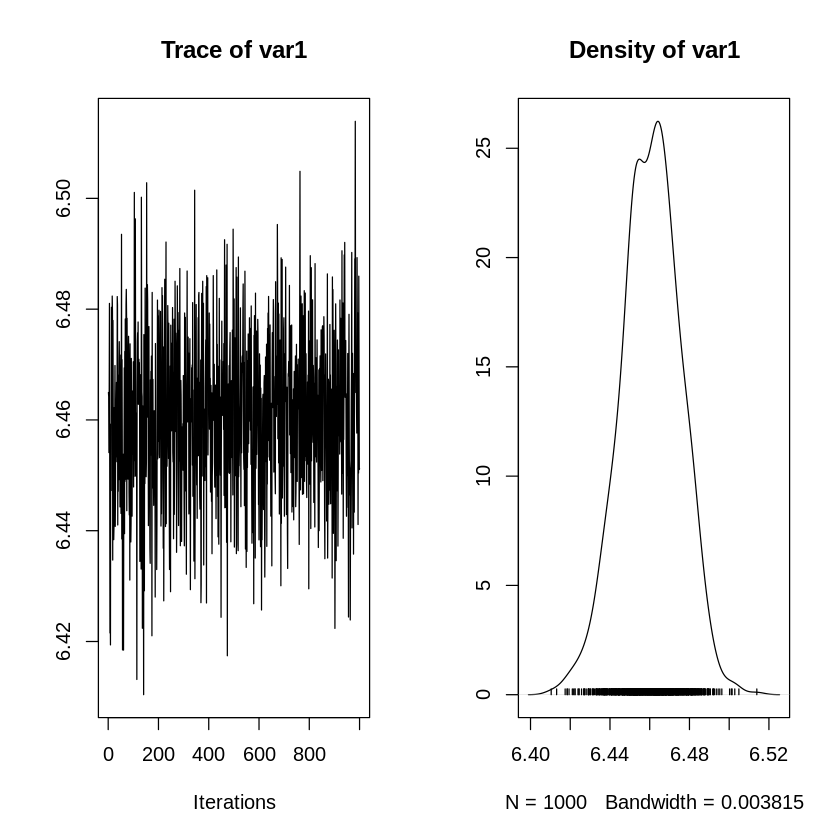

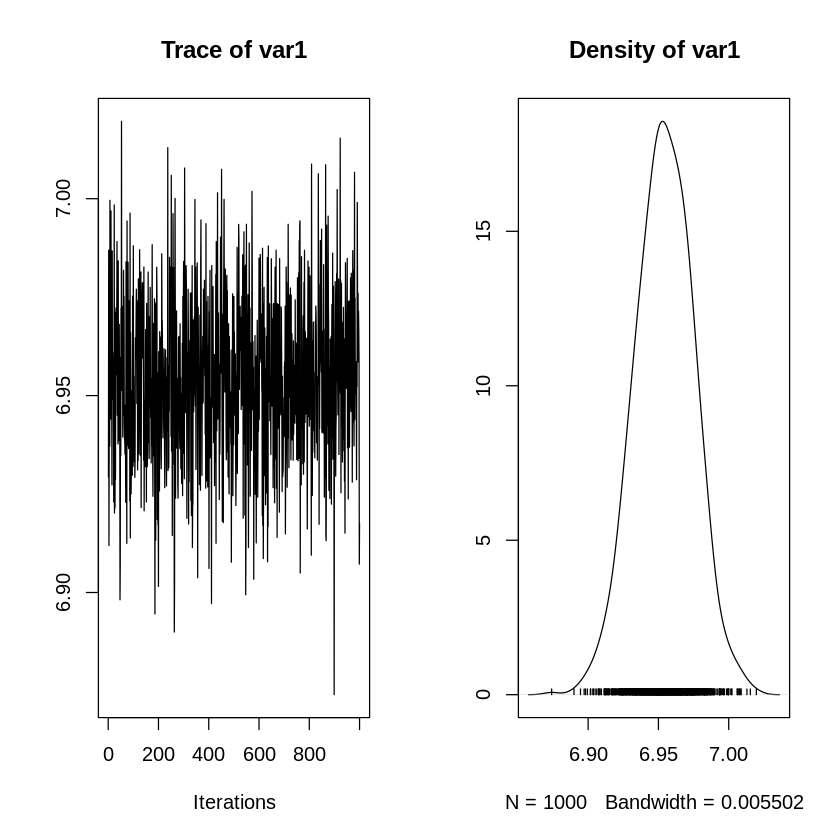

In [ ]:
bayes_Choice1 <-  ttestBF(x= compilation_SE1$Entropy, posterior = TRUE ,iterations = 1000)
plot(bayes_Choice1[,"mu"])

bayes_Choice2 <-  ttestBF(x= compilation_SE2$Entropy, posterior = TRUE ,iterations = 1000)
plot(bayes_Choice2[,"mu"])

bayes_Choice1_Choice2 <-  ttestBF(x= compilation_SE1$Entropy, y=compilation_SE2$Entropy,
                           posterior = TRUE ,iterations = 1000, paired = TRUE)

post_Choice1<- data.frame(mu = as.numeric(bayes_Choice1[,"mu"]), Posterior = 'Choice 1')
post_Choice2<- data.frame(mu = as.numeric(bayes_Choice2[,"mu"]), Posterior = 'Choice 2')
post_Choice1_Choice2<- data.frame(mu = as.numeric(bayes_Choice1_Choice2[,"mu"]), Posterior = 'Choice 1 & Choice 2')


$title
[1] "Choice1"

attr(,"class")
[1] "labels"

$title
[1] "Choice2"

attr(,"class")
[1] "labels"

$title
[1] "Choice1 & Choice2"

attr(,"class")
[1] "labels"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


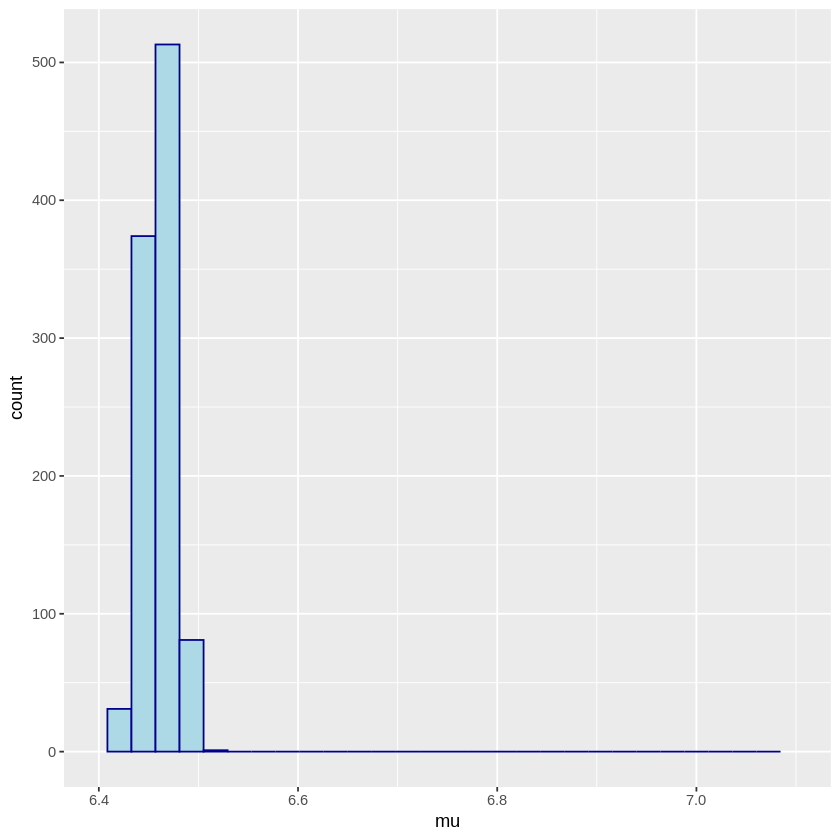

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


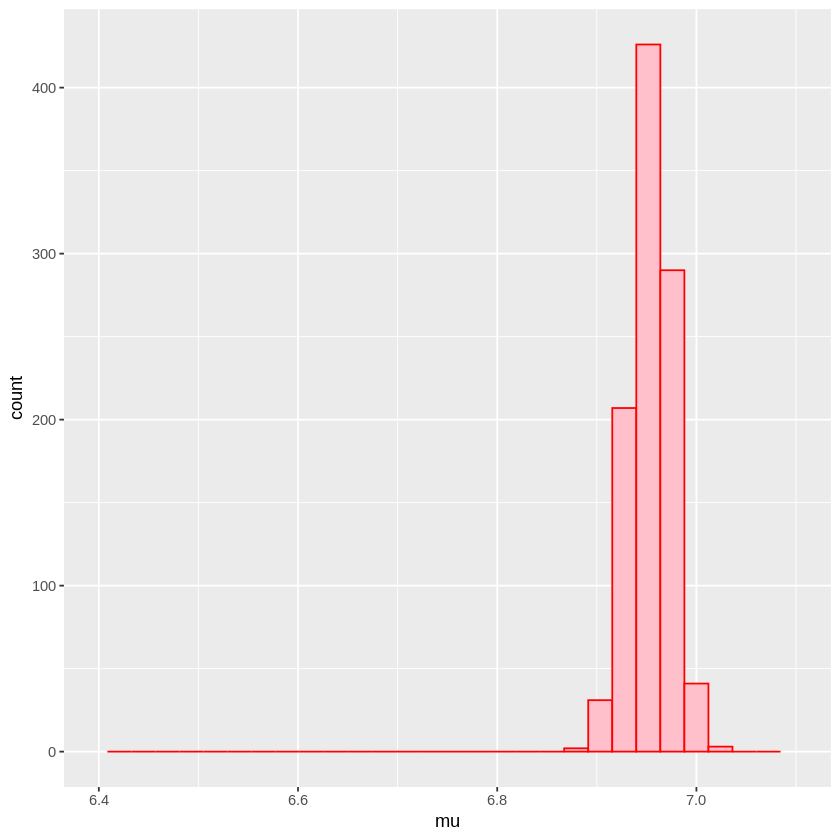

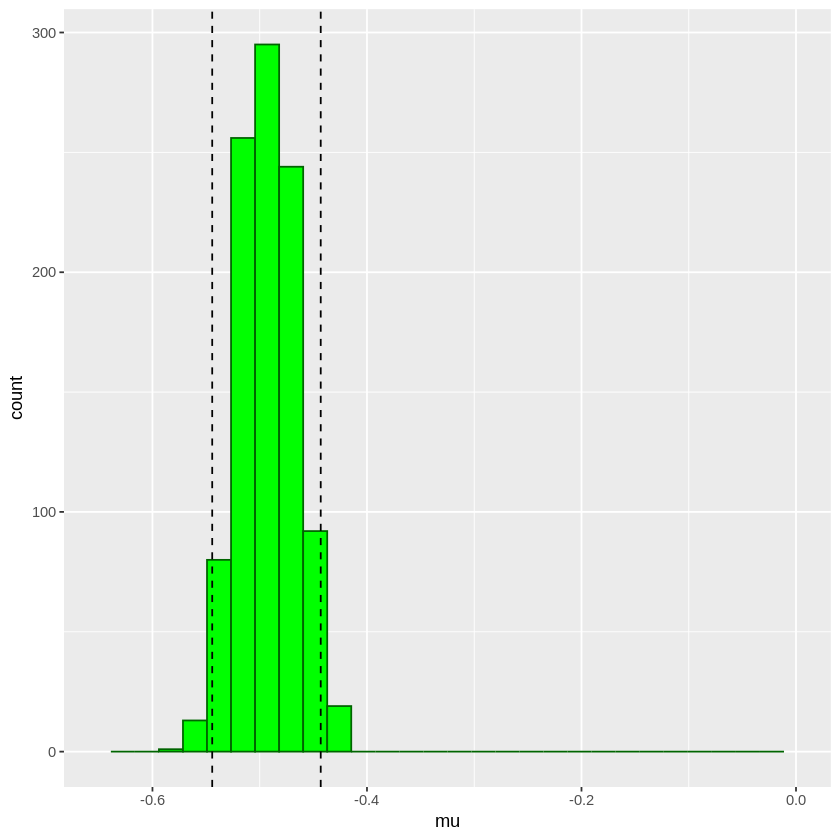

In [ ]:
library(HDInterval)
ci95<-hdi(post_Choice1_Choice2)

library(ggplot2)

plot_post_Choice1 <- ggplot(post_Choice1, aes(x=mu))+
  geom_histogram(color="darkblue", fill="lightblue")+
  xlim(6.4,7.1)
  ggtitle("Choice1")

plot_post_Choice2 <- ggplot(post_Choice2, aes(x=mu))+
  geom_histogram(color="red", fill="pink")+
  xlim(6.4,7.1)
  ggtitle("Choice2")

plot_post_Choice1_Choice2 <- ggplot(post_Choice1_Choice2, aes(x=mu))+
  geom_histogram(color="darkgreen", fill="green") +
  geom_vline(xintercept = as.numeric(ci95[1:2]), linetype="dashed",
             color = "black" )+
  xlim(-0.65, 0)
  ggtitle("Choice1 & Choice2")

plot_post_Choice1
plot_post_Choice2
plot_post_Choice1_Choice2